In [1]:
##### -*-coding:utf-8 -*-
# import all the libraries 
# python==3.8; jupyterlab==3.0.12; lumicks.pylake==0.8.1; matplotlib==3.3.4; more-itertools==8.7.0;
# npTDMS==1.1.0; numpy==1.20.1; opencv-python==4.5.1.48; pandas==1.2.3; scipy==1.6.1; tifffile==2021.3.5
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from matplotlib.colors import Normalize, LinearSegmentedColormap
import seaborn as sns
from scipy.interpolate import interp1d

%matplotlib widget

In [2]:
# read the correlated force data and image data from step2:(2_Correlation_image_force).e.g.:cycle#1-correlated_data.xlsx

cor_file = 'example_dataset/image data/20190529-143510 30nM DNAp + trx  + 625uM dNTPs #012-001-cycle#1-correlated_data.xlsx'
cor_file2 = 'example_dataset/image data/20190529-143510 30nM DNAp + trx  + 625uM dNTPs #012-001-cycle#1-Intensity along DNAp-filtered.txt' 
cor_file3 = 'example_dataset/image data/StepFit_Result/image data-cycle#1-Intensity along DNAp-filtered_fits.txt'


# We start by checking the previous data from step 1 and step2

In [3]:
# read the correlated force data
raw_basepair = pd.read_excel(cor_file,sheet_name = 'raw_basepair',engine='openpyxl')
cp_basepair = pd.read_excel(cor_file,sheet_name = 'cp_basepair',engine='openpyxl')
# read the correlated image data
raw_intensity = np.loadtxt(cor_file2)
filtered_intensity = np.genfromtxt(cor_file3, delimiter=',', skip_header=1)
step_intensity = pd.read_excel(cor_file,sheet_name = 'step_intensity')
binarized_intensity = pd.read_excel(cor_file,sheet_name = 'binarized_intensity')

time_intens = binarized_intensity['time/s']
time_intens = np.array(time_intens)
intensity_raw = raw_intensity.T[1]
intensity_filtered = filtered_intensity.T[1]
intensity = binarized_intensity['binarized_intensity']
intensity = np.array(intensity)
intensity_step = step_intensity['step_intensity']
intensity_step = np.array(intensity_step)

bp_time = raw_basepair['time/s']
bp_time = np.array(bp_time)
bp = raw_basepair['raw_basepair']
bp = np.array(bp)
cp_basepair_interp = cp_basepair['cp_basepair']
cp_basepair_interp = np.array(cp_basepair_interp)

# print(raw_basepair.head())
# print(cp_basepair.head())
# print(binarized_intensity.head())

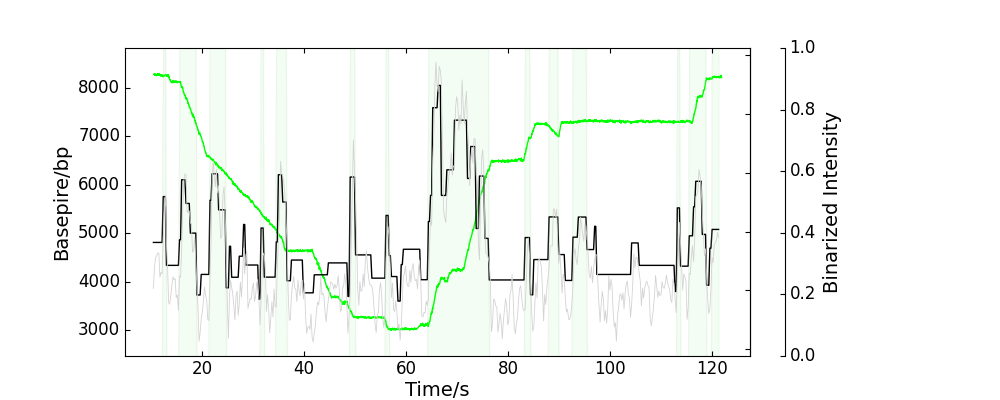

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [4]:
# plot the correlated force data and image data from step 2 to double check
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.labelsize': 14})
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams.update({'ytick.labelsize': 12})

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

offset = 25
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlabel("Time/s")
host.set_ylabel("Basepire/bp")
# host.set_ylabel("DNAp Activity Burst")
par1.set_ylabel("Step-like Intensity")
par2.set_ylabel("Binarized Intensity")

p0, = host.plot(bp_time,bp, "lime",label = 'Basepairs',linewidth=1)


# p0, = host.plot(bp_time[:-1],np.diff(cp_basepair_interp)/np.diff(bp_time),"red", label = "DNAp Activity Burst",linewidth = 1)
p1, = par1.plot(time_intens,intensity_step,color='black',linewidth=1, label='Step-like intensity')
p2, = par2.plot(time_intens,intensity,color='lightgray',linewidth=0.1, label='Binarized Intensity')
par2.fill_between(time_intens,intensity, 0, color='lightgreen',alpha=0.1)
p3, = par3.plot(time_intens,intensity_raw[:-2],color='lightgray',linewidth=0.6, linestyle='solid', markersize=0.5,label='Raw Intensity')

host.autoscale()
host.margins(0.1)

# par1.axhline(np.average(bagrnd_signal_filter)+threshold_sigma*np.std(bagrnd_signal_filter), color='grey', linestyle='--',label=str(threshold_sigma) + ' Sigma threshold')
# par1.axhline(np.average(bagrnd_signal_filter)-threshold_sigma*np.std(bagrnd_signal_filter), color='grey', linestyle='--')

par1.set_ylim(10, 77)
par2.set_ylim(0, 1)

par2.axis["right"].label.set_color(p1.get_color())
par2.axis('off')
par1.yaxis.set_ticklabels([])
par1.yaxis.set_ticks([])

# plt.ylim(6500,7800)
# plt.xlim(17,29)
plt.show()
plt.tight_layout()

plt.savefig(cor_file.replace('-correlated_data.xlsx', '-all_correlated_data-replot.eps'), format='eps', dpi=300,bbox_inches='tight')

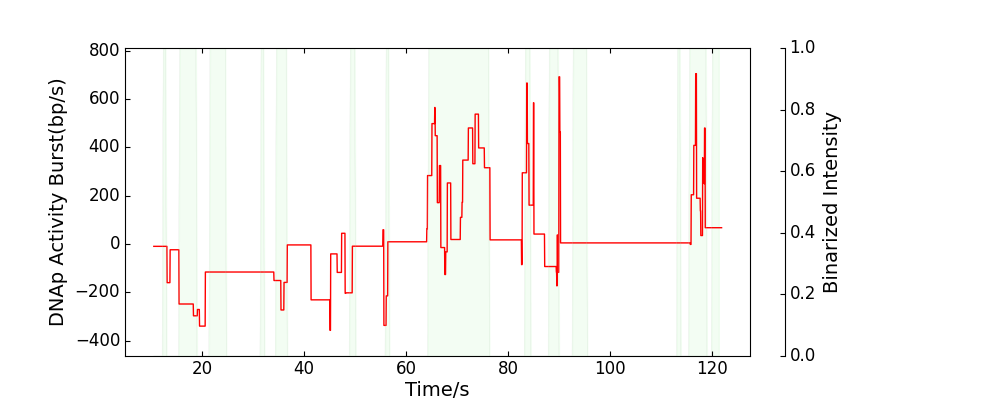

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [5]:
# plot the burst activity and fluorescence image data 
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.labelsize': 14})
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams.update({'ytick.labelsize': 12})

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
# par3 = host.twinx()

offset = 25
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlabel("Time/s")
host.set_ylabel("DNAp Activity Burst(bp/s)")
# par1.set_ylabel("Step-like Intensity",fontdict=font)
par2.set_ylabel("Binarized Intensity")

# p0, = host.plot(bp_time,bp, "lime",label = 'Basepairs',linewidth=1)

p0, = host.plot(bp_time[:-1],np.diff(cp_basepair_interp)/np.diff(bp_time),"red", label = "DNAp Activity Burst",linewidth = 1)
# p1, = par1.plot(time_intens,intensity_step,color='black',linewidth=1, label='Step-like intensity')
p2, = par2.plot(time_intens,intensity,color='lightgray',linewidth=0.1, label='Binarized Intensity')
par2.fill_between(time_intens,intensity, 0, color='lightgreen',alpha=0.1)
# p3, = par3.plot(time_intens,intensity_raw,color='lightgray',linewidth=0.6, linestyle='solid', markersize=0.5,label='Raw Intensity')

host.autoscale()
host.margins(0.1)

# par1.set_ylim(7, 87)
par2.set_ylim(0, 1)

par2.axis["right"].label.set_color(p1.get_color())
par2.axis('off')
par1.yaxis.set_ticklabels([])
par1.yaxis.set_ticks([])

# plt.xlim(32,40)
# plt.xlim(32,40)
# plt.close()
plt.show()
plt.tight_layout()

plt.savefig(cor_file.replace('-correlated_data.xlsx', '-Activity Burst Correlates with Fluorescence Signal.eps'), format='eps', dpi=300,bbox_inches='tight')


# We start to plot the correlation heatmap

In [6]:
# We define a customerized correlation facor based on the combination of fluorescence and protein activity, and plot it out
# in total we get four combinations: [0,0];[0,1];[1,0];[1,1]

df_activity_data = pd.DataFrame({'Time': bp_time[:-1], 'Activity': np.diff(cp_basepair_interp)/np.diff(bp_time)})

bins = [-np.inf, -15, 20, np.inf]
labels = [1, 0, 1]
df_activity_data['BinarizedActivity'] = pd.cut(df_activity_data['Activity'], bins=bins, labels=labels, ordered=False)

df_intensity_data = pd.DataFrame({'Time': time_intens, 'Intensity': intensity})

f = interp1d(df_activity_data['Time'], df_activity_data['BinarizedActivity'], bounds_error=False, fill_value="extrapolate")
df_activity_data_interpolated = pd.DataFrame({'Time': df_intensity_data['Time'], 
                                              'InterpolatedBinarizedActivity': f(df_intensity_data['Time'])})

# Merging the two dataframes
df_merged = pd.merge(df_intensity_data, df_activity_data_interpolated, on='Time')

# Add custom correlation column
conditions = [
    (df_merged['Intensity'] == 1) & (df_merged['InterpolatedBinarizedActivity'] == 1),
    (df_merged['Intensity'] == 0) & (df_merged['InterpolatedBinarizedActivity'] == 0),
    (df_merged['Intensity'] == 0) & (df_merged['InterpolatedBinarizedActivity'] == 1),
    (df_merged['Intensity'] == 1) & (df_merged['InterpolatedBinarizedActivity'] == 0),
]
values = [1, -1, 0.5, -0.5]

df_merged['CustomCorrelation'] = np.select(conditions, values)
print(df_merged)

           Time  Intensity  InterpolatedBinarizedActivity  CustomCorrelation
0     10.447000          0                            0.0               -1.0
1     10.660204          0                            0.0               -1.0
2     10.873408          0                            0.0               -1.0
3     11.086612          0                            0.0               -1.0
4     11.299816          0                            0.0               -1.0
..          ...        ...                            ...                ...
516  120.460306          1                            1.0                1.0
517  120.673510          1                            1.0                1.0
518  120.886714          1                            1.0                1.0
519  121.099918          1                            1.0                1.0
520  121.313122          1                            1.0                1.0

[521 rows x 4 columns]


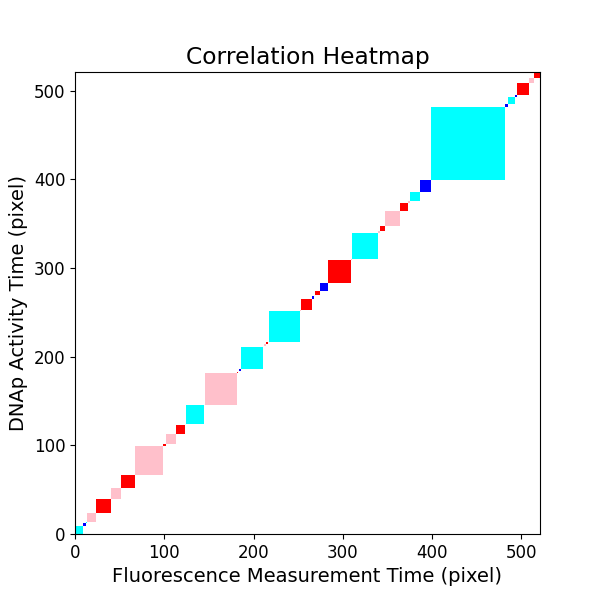

In [7]:
# We plot the correlation heatmap

# Define the size of the matrix
matrix_size = len(df_merged)

# Initialize an empty square matrix filled with zeros
matrix = np.zeros((matrix_size, matrix_size))

# Fill the diagonal from bottom-left to top-right with 'CustomCorrelation'
prev_val = df_merged['CustomCorrelation'].iat[0]
start_idx = 0
for idx, row in df_merged.iterrows():
    curr_val = row['CustomCorrelation']
    if curr_val != prev_val:
        end_idx = idx
        if np.all(matrix[matrix_size - end_idx:matrix_size - start_idx, start_idx:end_idx] == 0):
            matrix[matrix_size - end_idx:matrix_size - start_idx, start_idx:end_idx] = prev_val
        start_idx = idx
    prev_val = curr_val

# Handle the last group
if np.all(matrix[matrix_size - matrix_size:matrix_size - start_idx, start_idx:matrix_size] == 0):
    matrix[matrix_size - matrix_size:matrix_size - start_idx, start_idx:matrix_size] = prev_val

# Flip the matrix to make the y-axis ascending from bottom to top
matrix_flipped = np.flip(matrix, 0)

cmap = LinearSegmentedColormap.from_list(
    'custom', [(0, 'cyan'), (0.25, 'blue'), (0.5, 'white'), (0.75, 'pink'), (1, 'red')], N=5
)

plt.figure(figsize=(6, 6))
norm = Normalize(vmin=-1, vmax=1)

# Use pcolormesh, but rasterize the heatmap
X, Y = np.meshgrid(np.arange(matrix_flipped.shape[1] + 1), np.arange(matrix_flipped.shape[0] + 1))
pc = plt.pcolormesh(X, Y, matrix_flipped, cmap=cmap, norm=norm, shading='auto', rasterized=True)
plt.xlabel("Fluorescence Measurement Time (pixel)")
plt.ylabel("DNAp Activity Time (pixel)")
# plt.colorbar(shrink=0.8)
# plt.xlim(7,520)
plt.title('Correlation Heatmap')
# plt.savefig(cor_file.replace('-correlated_data.xlsx', '-correlation_heatmap_updated.eps'), format='eps', dpi=300,bbox_inches='tight')
plt.savefig(cor_file.replace('-correlated_data.xlsx', '-correlation_heatmap_updated.png'), format='png', dpi=300,bbox_inches='tight')

plt.show()
# plt.close()

In [8]:
# Initialize a dictionary to count the clusters
cluster_counts = {-1: 0, -0.5: 0, 0.5: 0, 1: 0}

# Minimum length of a sequence to be considered a cluster
min_cluster_length = 3

# Fill the diagonal from bottom-left to top-right with 'CustomCorrelation'
prev_val = df_merged['CustomCorrelation'].iat[0]
start_idx = 0
current_cluster_length = 1  # Initialize the cluster length counter
for idx, row in df_merged.iterrows():
    curr_val = row['CustomCorrelation']
    if curr_val != prev_val:
        if prev_val != 0 and current_cluster_length >= min_cluster_length:  # Count only clusters of minimum length
            cluster_counts[prev_val] += 1
        start_idx = idx
        current_cluster_length = 1  # Reset the cluster length counter
    else:
        current_cluster_length += 1  # Increment the cluster length counter
    prev_val = curr_val

# Increment the count for the last cluster if it meets the minimum length requirement
if prev_val != 0 and current_cluster_length >= min_cluster_length:
    cluster_counts[prev_val] += 1

print(cluster_counts)


{-1: 8, -0.5: 5, 0.5: 8, 1: 11}


In [9]:
def count_clusters(matrix, min_cluster_length):
    # Initialize a dictionary to count the clusters
    cluster_counts = {-1: 0, -0.5: 0, 0.5: 0, 1: 0}

    # Traverse the diagonal of the matrix
    prev_val = matrix.diagonal()[0]
    start_idx = 0
    current_cluster_length = 1
    for idx, curr_val in enumerate(matrix.diagonal()):
        if curr_val != prev_val:
            if prev_val != 0 and current_cluster_length >= min_cluster_length:
                cluster_counts[prev_val] += 1
            start_idx = idx
            current_cluster_length = 1
        else:
            current_cluster_length += 1
        prev_val = curr_val

    # Increment the count for the last cluster if it meets the minimum length requirement
    if prev_val != 0 and current_cluster_length >= min_cluster_length:
        cluster_counts[prev_val] += 1

    return cluster_counts

# Define the size of the matrix
matrix_size = len(df_merged)

# # Split index
# split_idx = int(input("Enter the split index in pixel: "))
split_idx = int(260)

while split_idx <= 0 or split_idx >= matrix_size:
    print("Invalid split index. It must be between 1 and the size of the matrix minus 1.")
    split_idx = int(input("Enter the split index: "))

# Split the matrix
matrix_flipped_1 = matrix_flipped[:split_idx, :split_idx]
matrix_flipped_2 = matrix_flipped[split_idx:, split_idx:]

# Count clusters in each matrix
cluster_counts_1 = count_clusters(matrix_flipped_1, min_cluster_length=3)
cluster_counts_2 = count_clusters(matrix_flipped_2, min_cluster_length=3)

print(f"Cluster counts in first matrix: {cluster_counts_1}")
print(f"Cluster counts in second matrix: {cluster_counts_2}")



Cluster counts in first matrix: {-1: 4, -0.5: 1, 0.5: 5, 1: 5}
Cluster counts in second matrix: {-1: 4, -0.5: 4, 0.5: 3, 1: 7}


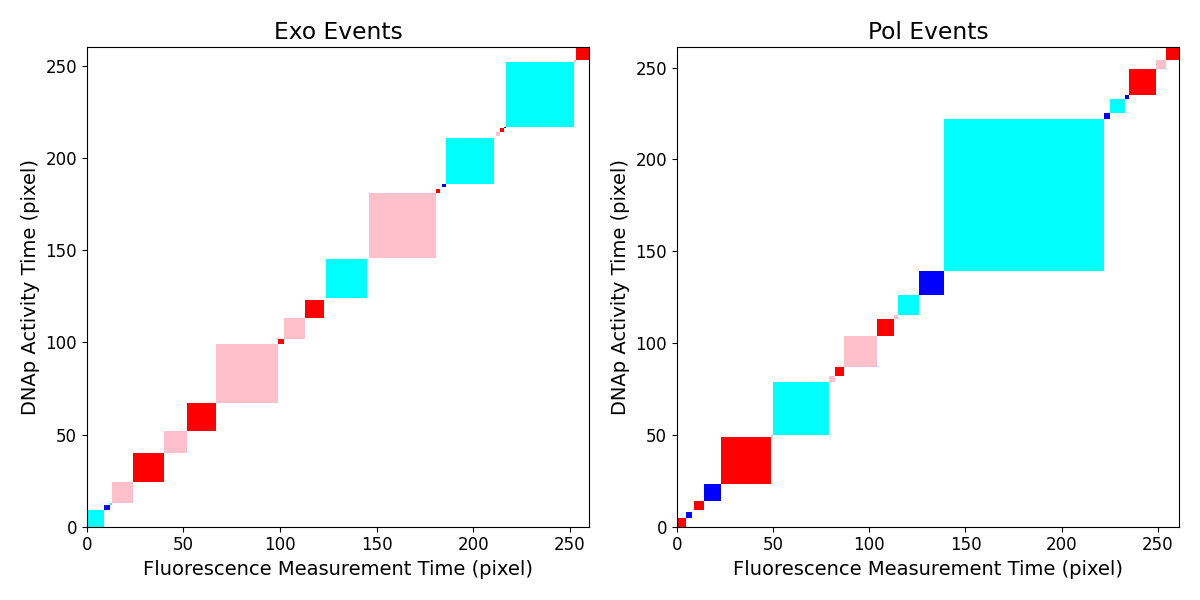

In [10]:
import json

# save the data to `heatmap_data_path`
heatmap_data_path = cor_file.replace('-correlated_data.xlsx', 'cluster_counts.json')
# Save cluster_counts_1 and cluster_counts_2 to a file
with open(heatmap_data_path, 'w') as f:
    json.dump({"cluster_counts_1": cluster_counts_1, "cluster_counts_2": cluster_counts_2}, f)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Colormap and normalization
cmap = LinearSegmentedColormap.from_list(
    'custom', [(0, 'cyan'), (0.25, 'blue'), (0.5, 'white'), (0.75, 'pink'), (1, 'red')], N=5
)
norm = Normalize(vmin=-1, vmax=1)

# X and Y coordinates for pcolormesh
X1, Y1 = np.meshgrid(np.arange(matrix_flipped_1.shape[1] + 1), np.arange(matrix_flipped_1.shape[0] + 1))
X2, Y2 = np.meshgrid(np.arange(matrix_flipped_2.shape[1] + 1), np.arange(matrix_flipped_2.shape[0] + 1))

# First matrix plot using pcolormesh and rasterized heatmap
pc1 = ax[0].pcolormesh(X1, Y1, matrix_flipped_1, cmap=cmap, norm=norm, shading='auto', rasterized=True)
ax[0].set_title("Exo Events")
ax[0].set_xlabel("Fluorescence Measurement Time (pixel)")
ax[0].set_ylabel("DNAp Activity Time (pixel)")

# Print cluster_counts_1
# for i, (key, value) in enumerate(cluster_counts_1.items()):
#     ax[0].text(0.1, 0.8-i*0.1, f"{key}: {value}", transform=ax[0].transAxes)

# Second matrix plot using pcolormesh and rasterized heatmap
pc2 = ax[1].pcolormesh(X2, Y2, matrix_flipped_2, cmap=cmap, norm=norm, shading='auto', rasterized=True)
ax[1].set_title("Pol Events")
ax[1].set_xlabel("Fluorescence Measurement Time (pixel)")
ax[1].set_ylabel("DNAp Activity Time (pixel)")

# Print cluster_counts_2
# for i, (key, value) in enumerate(cluster_counts_2.items()):
#     ax[1].text(0.1, 0.8-i*0.1, f"{key}: {value}", transform=ax[1].transAxes)

plt.subplots_adjust(wspace=0.4)  # Adjust the space between subplots
plt.tight_layout()
plt.savefig(cor_file.replace('-correlated_data.xlsx', '-correlation_exo_pol_heatmap.eps'), format='eps', dpi=300,bbox_inches='tight')
plt.savefig(cor_file.replace('-correlated_data.xlsx', '-correlation_exo_pol_heatmap.png'), format='png', dpi=300,bbox_inches='tight')

plt.show()


In [11]:
pasue

NameError: name 'pasue' is not defined

# You can ONLY be able to run the following code,until you finished analyzing all the datasets
# we start to analyze all the correlation heatmaps data 
- the ratio of non-fluorescent pausing to all the pausing events [0,0]/([0,0]+[1,0]) 
- (num of -0.5 / (num of -0.5 + num of -1)

Zero denominator encountered in cluster_counts_2
Zero denominator encountered in cluster_counts_1
Zero denominator encountered in cluster_counts_2
Zero denominator encountered in cluster_counts_1
Total data sets analyzed: 36
Total '-1' and '-0.5' counts in cluster 1: 275
Total '-1' and '-0.5' counts in cluster 2: 425


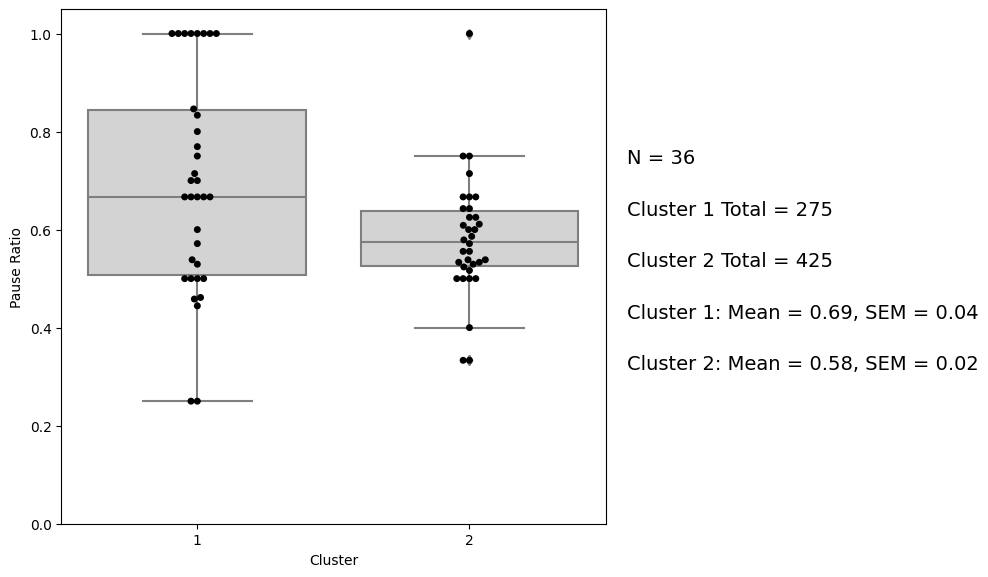

In [1]:
import os
import glob
import json
import numpy as np
from scipy.stats import sem
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Change the working directory to your root directory
os.chdir('/Users/longfu/Library/CloudStorage/Dropbox/1-Doctorate Research/3-T7 DNAp_Nat Com～working/RawData_ProcessingData')

# Find all JSON files
json_files = glob.glob('**/*.json', recursive=True)

# Initialize a DataFrame to store pause_ratio
pause_ratios = pd.DataFrame(columns=['Pause Ratio', 'Cluster'])

data_set_counter = 0
# Initialize counters for the specific conditions
total_counter_1 = 0
total_counter_2 = 0
# Iterate over the json files
for json_file in json_files:
    # Load the json file
    with open(json_file) as f:
        data = json.load(f)
    data_set_counter += 1  # Increment the counter by 1 for each data set
    
    # Compute the pause_ratio for each part of the dataset
    for key in ['cluster_counts_1', 'cluster_counts_2']:
        if '-1' in data[key] and '-0.5' in data[key]:
            if data[key]['-1'] + data[key]['-0.5'] != 0:
                pause_ratio = data[key]['-1'] / (data[key]['-1'] + data[key]['-0.5'])
                pause_ratios = pd.concat([pause_ratios, pd.DataFrame({'Pause Ratio': [pause_ratio], 'Cluster': [key[-1]]})], ignore_index=True)
                # Update the counters
                if key == 'cluster_counts_1':
                    total_counter_1 += data[key]['-1'] + data[key]['-0.5']
                elif key == 'cluster_counts_2':
                    total_counter_2 += data[key]['-1'] + data[key]['-0.5']
            else:
                print(f"Zero denominator encountered in {key}")

print(f"Total data sets analyzed: {data_set_counter}")
print(f"Total '-1' and '-0.5' counts in cluster 1: {total_counter_1}")
print(f"Total '-1' and '-0.5' counts in cluster 2: {total_counter_2}")

# Export the pause_ratios DataFrame to an Excel file
pause_ratios.to_excel('pause_ratios_figure 2F.xlsx', index=False)

# Create a 1x2 grid of subplots
# The first subplot (for the boxplot) is 5 times wider than the second (for the text)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [8, 1]})
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.labelsize': 14})
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams.update({'ytick.labelsize': 12})
# Hide the axes for the second subplot (since we only use it for text)
ax2.axis('off')
ax1.set_ylim(0,1.05)

sns.boxplot(x='Cluster', y='Pause Ratio', data=pause_ratios, color='lightgray', ax=ax1)
sns.swarmplot(x='Cluster', y='Pause Ratio', data=pause_ratios, color='black', ax=ax1)

ax2.text(0.0, 0.7, f"N = {data_set_counter}", transform=ax2.transAxes)
ax2.text(0.0, 0.6, f"Cluster 1 Total = {total_counter_1}", transform=ax2.transAxes)
ax2.text(0.0, 0.5, f"Cluster 2 Total = {total_counter_2}", transform=ax2.transAxes)

# Calculate mean and SEM for each cluster
clusters = ['1', '2']
for i, cluster in enumerate(clusters):
    cluster_data = pause_ratios[pause_ratios['Cluster'] == cluster]
    mean = cluster_data['Pause Ratio'].mean()
    standard_error = sem(cluster_data['Pause Ratio'])
    cluster_counts = cluster_data['Cluster'].count()  # Count the number of clusters

    # Add mean, SEM and cluster counts to the plot
    ax2.text(0.0, 0.4 - 0.1 * i, f"Cluster {cluster}: Mean = {mean:.2f}, SEM = {standard_error:.2f}", transform=ax2.transAxes)


plt.tight_layout()
# plt.savefig("/Users/longfu/Library/CloudStorage/Dropbox/3-T7 DNAp_Nat Com～working/fig_prep/fig2F.eps", format='eps', dpi=300, bbox_inches='tight')
# plt.savefig("/Users/longfu/Library/CloudStorage/Dropbox/3-T7 DNAp_Nat Com～working/fig_prep/fig2F.png", format='png', dpi=300, bbox_inches='tight')
plt.show()


# we further analyze all the correlation heatmaps data 
- the ratio of non-fluorescent pausing & activity with fluorescent pausing activity & activity. ([0,0]+[0,1])/([1,1]+[1,0]) 
- (num of -1 + num of 0.5)/(num of 1 + num of -0.5) 

In [ ]:
import os
import glob
import json
import numpy as np
from scipy.stats import sem
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Change the working directory to your root directory
os.chdir('/Users/longfu/Library/CloudStorage/Dropbox/1-Doctorate Research/3-T7 DNAp_Nat Com～working/Submision prep/Data Repo')

# Find all JSON files
json_files = glob.glob('**/*.json', recursive=True)

# Initialize a DataFrame to store pause_ratio
pause_ratios = pd.DataFrame(columns=['Pause Ratio', 'Cluster'])

data_set_counter = 0
# Initialize counters for the specific conditions
total_counter_1 = 0
total_counter_2 = 0
total_counter_3 = 0
total_counter_4 = 0

# Iterate over the json files
for json_file in json_files:
    # Load the json file
    with open(json_file) as f:
        data = json.load(f)
    data_set_counter += 1  # Increment the counter by 1 for each data set
    
    # Compute the pause_ratio for each part of the dataset
    for key in ['cluster_counts_1', 'cluster_counts_2']:
        if '1' in data[key] and '-0.5' in data[key]:
            # Update the counters
            if key == 'cluster_counts_1':
                total_counter_1 += data[key]['1'] + data[key]['-0.5']
            elif key == 'cluster_counts_2':
                total_counter_2 += data[key]['1'] + data[key]['-0.5']
        
        if '-1' in data[key] and '0.5' in data[key]:
            # Update the counters
            if key == 'cluster_counts_1':
                total_counter_3 += data[key]['-1'] + data[key]['0.5']
            elif key == 'cluster_counts_2':
                total_counter_4 += data[key]['-1'] + data[key]['0.5']

print(f"Total data sets analyzed: {data_set_counter}")
print(f"Total '1' and '-0.5' counts in cluster 1: {total_counter_1}")
print(f"Total '1' and '-0.5' counts in cluster 2: {total_counter_2}")
print(f"Total '-1' and '0.5' counts in cluster 1: {total_counter_3}")
print(f"Total '-1' and '0.5' counts in cluster 2: {total_counter_4}")


In [ ]:

# Create a 1x2 grid of subplots
# The first subplot (for the boxplot) is 5 times wider than the second (for the text)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [8, 1]})
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.labelsize': 14})
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams.update({'ytick.labelsize': 12})
# Hide the axes for the second subplot (since we only use it for text)
ax2.axis('off')
ax1.set_ylim(0,1.05)

sns.boxplot(x='Cluster', y='Pause Ratio', data=pause_ratios, color='lightgray', ax=ax1)
sns.swarmplot(x='Cluster', y='Pause Ratio', data=pause_ratios, color='black', ax=ax1)

ax2.text(0.0, 0.7, f"N = {data_set_counter}", transform=ax2.transAxes)
ax2.text(0.0, 0.6, f"Cluster 1 Total = {total_counter_1}", transform=ax2.transAxes)
ax2.text(0.0, 0.5, f"Cluster 2 Total = {total_counter_2}", transform=ax2.transAxes)

# Calculate mean and SEM for each cluster
clusters = ['1', '2']
for i, cluster in enumerate(clusters):
    cluster_data = pause_ratios[pause_ratios['Cluster'] == cluster]
    mean = cluster_data['Pause Ratio'].mean()
    standard_error = sem(cluster_data['Pause Ratio'])
    cluster_counts = cluster_data['Cluster'].count()  # Count the number of clusters

    # Add mean, SEM and cluster counts to the plot
    ax2.text(0.0, 0.4 - 0.1 * i, f"Cluster {cluster}: Mean = {mean:.2f}, SEM = {standard_error:.2f}", transform=ax2.transAxes)


plt.tight_layout()
plt.savefig("/Users/longfu/Library/CloudStorage/Dropbox/3-T7 DNAp_Nat Com～working/fig_prep/fig2F.eps", format='eps', dpi=300, bbox_inches='tight')
plt.savefig("/Users/longfu/Library/CloudStorage/Dropbox/3-T7 DNAp_Nat Com～working/fig_prep/fig2F.png", format='png', dpi=300, bbox_inches='tight')
plt.show()